In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_scale_radius, get_data, shift_gal, peak_detection, draw_images
import cosmos_params

sys.path.insert(0,'../scripts/tools_for_VAE/')
from tools_for_VAE import utils, vae_functions, generator, model, plot, layers

/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [5]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [6]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [7]:
res[2]

{'redshift_0': 0.6460999846458435,
 'moment_sigma_0': 2.4461119174957275,
 'e1_0': 0.1710718423128128,
 'e2_0': -0.2852787375450134,
 'mag_0': 26.555559552892444,
 'nb_blended_gal': 1,
 'mag': 26.555559552892444,
 'mag_ir': -1.079536121205277,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 40.53332645598804,
 'SNR_peak': 0.0384243893148058}

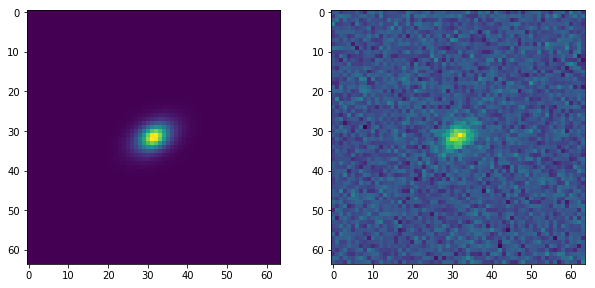

In [8]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [9]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [10]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [11]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [12]:
res[2]

{'redshift_0': 2.3208999633789062,
 'moment_sigma_0': 1.5786387920379639,
 'e1_0': 0.14665314555168152,
 'e2_0': 0.4472491443157196,
 'mag_0': 27.14861889266381,
 'redshift_1': 0.6586999893188477,
 'moment_sigma_1': 2.278747320175171,
 'e1_1': -0.5404533743858337,
 'e2_1': 0.38646844029426575,
 'mag_1': 26.80650240563193,
 'redshift_2': 0.3653999865055084,
 'moment_sigma_2': 1.9419138431549072,
 'e1_2': -0.25844046473503113,
 'e2_2': 0.07414741069078445,
 'mag_2': 26.8118505697036,
 'redshift_3': 0.4982999861240387,
 'moment_sigma_3': 2.8294317722320557,
 'e1_3': -0.024330204352736473,
 'e2_3': -0.07777753472328186,
 'mag_3': 26.04703847544355,
 'redshift_4': 0.8414999842643738,
 'moment_sigma_4': 3.0559022426605225,
 'e1_4': 0.30434590578079224,
 'e2_4': 0.19397851824760437,
 'mag_4': 25.06410236063855,
 'redshift_5': 0.8973000049591064,
 'moment_sigma_5': 2.2066662311553955,
 'e1_5': -0.4542604386806488,
 'e2_5': -0.3645181357860565,
 'mag_5': 26.598899611539036,
 'nb_blended_gal': 6

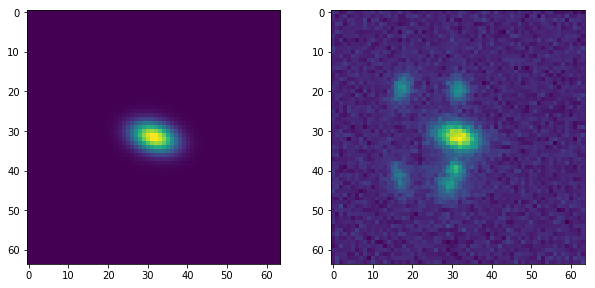

In [13]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the 'nmax_blend' parameter to (2,5).

In [14]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [15]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

TypeError: '<' not supported between instances of 'int' and 'tuple'

In [ ]:
res[2]

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter 'center_brightest' is set to 'False', the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when 'center_brightest' is set to 'True'.

## Generate image of isolated galaxies

In [14]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [15]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [16]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [17]:
res[2]

{'mag_0': 25.164876848509234,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.115971803665161,
 'e1_0': -0.10639065504074097,
 'e2_0': -0.32629287242889404,
 'nb_blended_gal': 1,
 'mag': 25.164876848509234,
 'mag_ir': -2.7664863919176046,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 130.72322807053948,
 'SNR_peak': 0.09558793656938232}

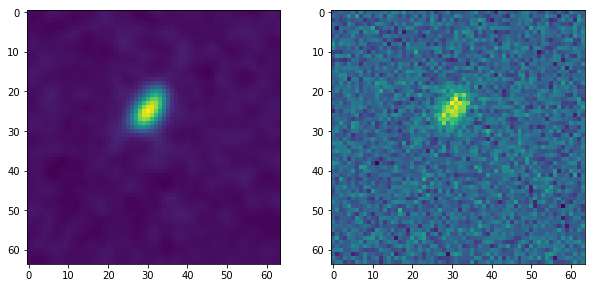

In [18]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [19]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [20]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [21]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [22]:
res[2]

{'mag_0': 23.38298981142764,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.5032968521118164,
 'e1_0': 0.02283249981701374,
 'e2_0': 1.005467176437378,
 'mag_1': 24.903116917653414,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.391683578491211,
 'e1_1': -0.10895619541406631,
 'e2_1': -0.02515043318271637,
 'mag_2': 25.81611916209125,
 'redshift_2': 0.0,
 'moment_sigma_2': 1.7295399904251099,
 'e1_2': 0.027236998081207275,
 'e2_2': -0.2474757730960846,
 'mag_3': 25.203642384909546,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.641918659210205,
 'e1_3': 0.16579753160476685,
 'e2_3': 0.4585452377796173,
 'mag_4': 21.992756605630866,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.9265475273132324,
 'e1_4': -0.2691175043582916,
 'e2_4': 0.23928886651992798,
 'mag_5': 24.712162458365917,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.5070364475250244,
 'e1_5': 0.20666247606277466,
 'e2_5': -0.02110944874584675,
 'nb_blended_gal': 6,
 'mag': 21.992756605630866,
 'mag_ir': -5.452581819624248,
 'closest_mag': 25.203642384

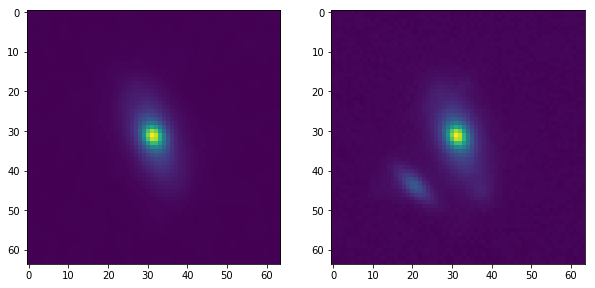

In [23]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 1 and 128 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [47]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 128 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [48]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [49]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [50]:
res[2]

{'redshift_0': 0.2353000044822693,
 'moment_sigma_0': 1.8922524452209473,
 'e1_0': 0.24357900023460388,
 'e2_0': 0.28219184279441833,
 'mag_0': 26.862502563187547,
 'redshift_1': 0.9843000173568726,
 'moment_sigma_1': 2.724438428878784,
 'e1_1': 0.02511397935450077,
 'e2_1': 0.03749178722500801,
 'mag_1': 25.422366517497156,
 'redshift_2': 1.9803999662399292,
 'moment_sigma_2': 2.4588770866394043,
 'e1_2': 0.25365230441093445,
 'e2_2': 0.19283539056777954,
 'mag_2': 26.955102264153968,
 'redshift_3': 0.8605999946594238,
 'moment_sigma_3': 2.2757225036621094,
 'e1_3': 0.14328151941299438,
 'e2_3': -0.47484731674194336,
 'mag_3': 25.950776105448952,
 'redshift_4': 1.2526999711990356,
 'moment_sigma_4': 2.071643590927124,
 'e1_4': 0.08166424185037613,
 'e2_4': 0.0802626758813858,
 'mag_4': 26.048124931830696,
 'redshift_5': 0.35109999775886536,
 'moment_sigma_5': 4.710196018218994,
 'e1_5': -0.09521174430847168,
 'e2_5': -0.01824888028204441,
 'mag_5': 21.895889380110084,
 'redshift_6': 0

In [51]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

128 galaxies are added to this image.


Here res[0] is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter center_brightest to False.

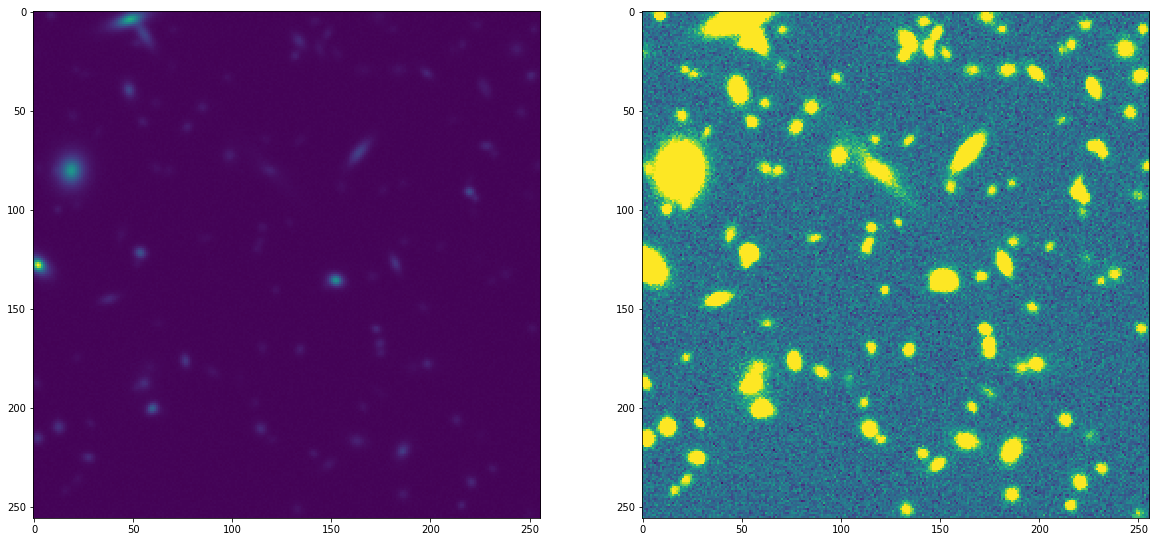

In [52]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the plot_rgb function of the plot module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


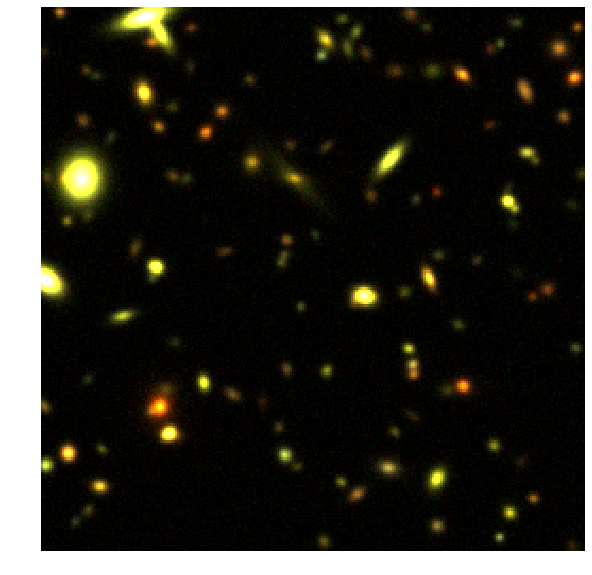

In [53]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


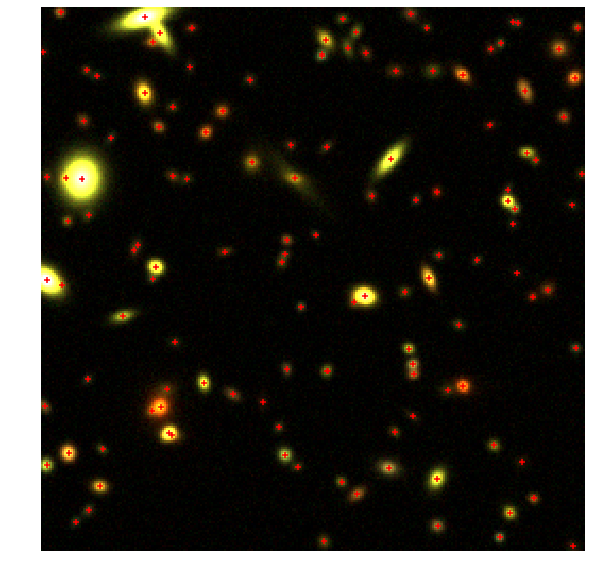

In [54]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [33]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 128 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [34]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [35]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [36]:
res[2]

{'mag_0': 23.784947958437705,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.2810230255126953,
 'e1_0': -0.22980612516403198,
 'e2_0': -0.17077051103115082,
 'mag_1': 23.632770811243255,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.7342827320098877,
 'e1_1': 0.11154297739267349,
 'e2_1': -0.08786758780479431,
 'mag_2': 23.378283609922832,
 'redshift_2': 0.0,
 'moment_sigma_2': 3.175205707550049,
 'e1_2': 0.4342897832393646,
 'e2_2': 0.16574884951114655,
 'mag_3': 23.461691860790257,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.230759859085083,
 'e1_3': 0.26382794976234436,
 'e2_3': 0.3888780176639557,
 'mag_4': 23.538027489112224,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.1241304874420166,
 'e1_4': -0.004782894626259804,
 'e2_4': 0.2165663242340088,
 'mag_5': 23.212722691679563,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.653623580932617,
 'e1_5': 0.019625332206487656,
 'e2_5': 0.18510347604751587,
 'mag_6': 22.375715959307446,
 'redshift_6': 0.0,
 'moment_sigma_6': 3.714327096939087,
 'e1_6': 0.8462857

In [37]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

128 galaxies are added to this image.


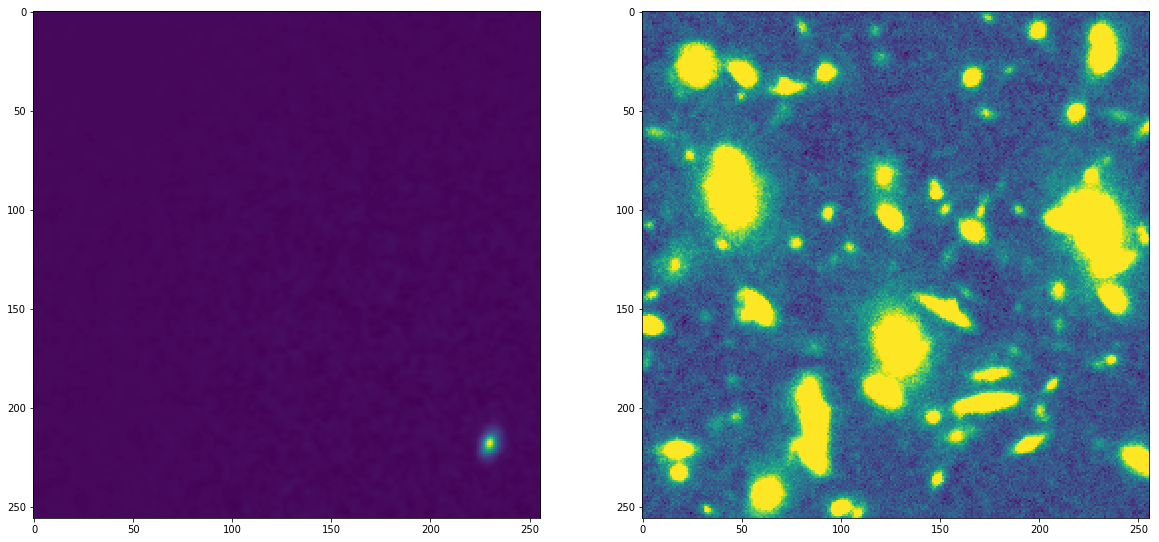

In [38]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


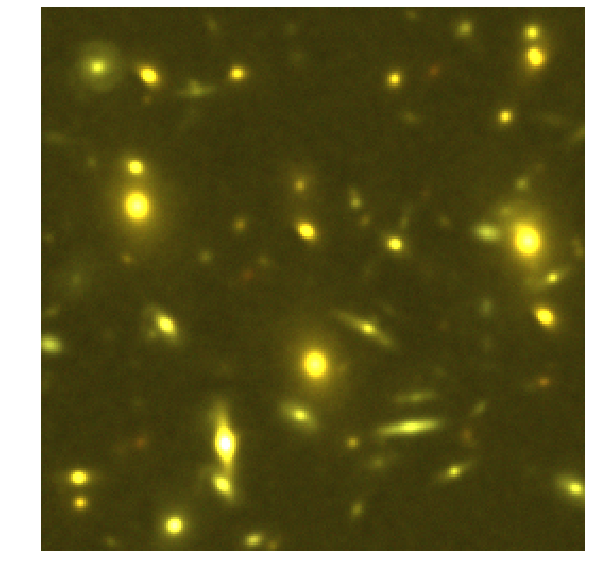

In [44]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


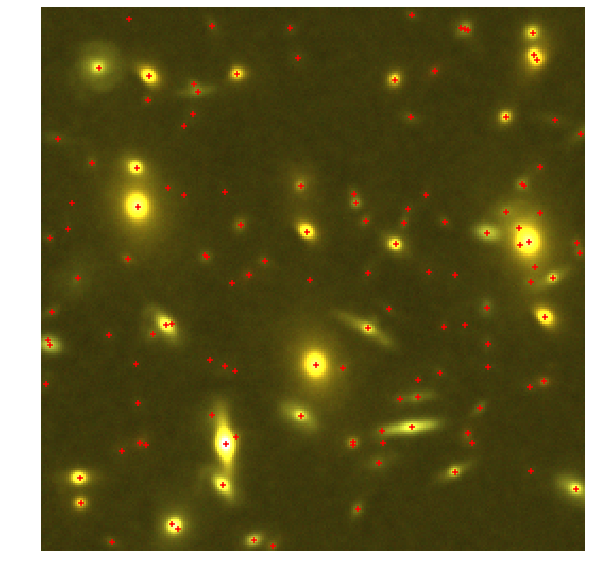

In [40]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)